In [1]:
from matplotlib import cm
import pandas as pd
import seaborn as sns
pd.options.display.float_format = "{:,.2f}".format
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load form data
dataframe = pd.read_csv('The impacts of COVID-19 on freelancing as a career.csv')
dataframe.head()

,Timestamp,Which freelancing platform do you work on?,"During the COVID-19 pandemic, you are getting fewer job invitations than before.","In the freelancing platform where you work, there are fewer job posts during the COVID-19 pandemic than before.","During the COVID-19 pandemic, clients are offering lower prices for work than before.","During the COVID-19 pandemic, you are getting more job invitations than before.","In the freelancing platform where you work, there are more job posts during the COVID-19 pandemic than before.","During the COVID-19 pandemic, clients are offering higher prices for work than before.",Those past eight months have been hard for you to get new contracts as a freelancer for the COVID-19 pandemic.,"In the past eight months, you have got more contracts than in previous years.",What do you think about the reason for this increment?,What do you think about the reason for this decrement?,Staying home during the COVID-19 pandemic is an advantage for your freelancing career.,During the COVID-19 pandemic are you facing difficulties in delivering works in time?,During the COVID-19 pandemic are you facing difficulties in delivering quality work?,Based on your experience do you think during the COVID-19 pandemic your clients are delaying in releasing the funds?,Rate the present situation of the freelancing marketplace you work in.
0,9/9/2020 10:26:09,Upwork,Neutral,Neutral,Strongly disagree,Agree,Agree,Disagree,Disagree,Agree,Increase in online-based jobs,NaN,Neutral,Yes,Yes,No,1
1,9/13/2020 9:11:11,Upwork,Agree,Agree,Disagree,Neutral,Agree,Agree,Disagree,Agree,Increase in online-based jobs,NaN,Strongly agree,No,No,No,5
2,9/16/2020 16:38:39,Freelancer,Neutral,Neutral,Neutral,Disagree,Disagree,Neutral,Agree,Agree,World economical situation,NaN,Neutral,No,No,No,2
3,9/16/2020 23:07:20,Upwork,Agree,Neutral,Disagree,Disagree,Neutral,Disagree,Agree,Disagree,NaN,COVID-19 pandemic,Agree,No,No,No,3
4,9/19/2020 1:39:51,Upwork,Disagree,Neutral,Disagree,Strongly agree,Strongly agree,Agree,Neutral,Agree,World economical situation,NaN,Strongly agree,No,No,No,5


In [3]:
# rename colums
column_names = {
    'Timestamp': 'Timestamp',
    'Which freelancing platform do you work on?': 'Freelancing Platform',
    'During the COVID-19 pandemic, you are getting fewer job invitations than before.': 'Getting Fewer Invitations',
    'In the freelancing platform where you work, there are fewer job posts during the COVID-19 pandemic than before.': 'Fewer Job Posts',
    'During the COVID-19 pandemic, clients are offering lower prices for work than before.': 'Lower Job Prices',
    'During the COVID-19 pandemic, you are getting more job invitations than before.': 'Getting More Invitations',
    'In the freelancing platform where you work, there are more job posts during the COVID-19 pandemic than before.': 'More Job Posts',
    'During the COVID-19 pandemic, clients are offering higher prices for work than before.': 'Higher Job Prices',
    'Those past eight months have been hard for you to get new contracts as a freelancer for the COVID-19 pandemic.': 'Getting Fewer Contracts',
    'In the past eight months, you have got more contracts than in previous years.': 'Getting More Contracts',
    'What do you think about the reason for this increment?': 'Increment Reason',
    'What do you think about the reason for this decrement?': 'Decrement Reason',
    'Staying home during the COVID-19 pandemic is an advantage for your freelancing career.': 'Staying Home Advantage',
    'During the COVID-19 pandemic are you facing difficulties in delivering works in time?': 'Affecting Work Timeline',
    'During the COVID-19 pandemic are you facing difficulties in delivering quality work?': 'Affecting Work Quality',
    'Based on your experience do you think during the COVID-19 pandemic your clients are delaying in releasing the funds?': 'Payment Delay',
    'Rate the present situation of the freelancing marketplace you work in.': 'Marketplace Situation Rating',
}
dataframe.rename(columns=column_names, inplace=True)
dataframe.Timestamp = pd.to_datetime(dataframe.Timestamp)
dataframe.head()

,Timestamp,Freelancing Platform,Getting Fewer Invitations,Fewer Job Posts,Lower Job Prices,Getting More Invitations,More Job Posts,Higher Job Prices,Getting Fewer Contracts,Getting More Contracts,Increment Reason,Decrement Reason,Staying Home Advantage,Affecting Work Timeline,Affecting Work Quality,Payment Delay,Marketplace Situation Rating
0,2020-09-09 10:26:09,Upwork,Neutral,Neutral,Strongly disagree,Agree,Agree,Disagree,Disagree,Agree,Increase in online-based jobs,NaN,Neutral,Yes,Yes,No,1
1,2020-09-13 09:11:11,Upwork,Agree,Agree,Disagree,Neutral,Agree,Agree,Disagree,Agree,Increase in online-based jobs,NaN,Strongly agree,No,No,No,5
2,2020-09-16 16:38:39,Freelancer,Neutral,Neutral,Neutral,Disagree,Disagree,Neutral,Agree,Agree,World economical situation,NaN,Neutral,No,No,No,2
3,2020-09-16 23:07:20,Upwork,Agree,Neutral,Disagree,Disagree,Neutral,Disagree,Agree,Disagree,NaN,COVID-19 pandemic,Agree,No,No,No,3
4,2020-09-19 01:39:51,Upwork,Disagree,Neutral,Disagree,Strongly agree,Strongly agree,Agree,Neutral,Agree,World economical situation,NaN,Strongly agree,No,No,No,5


In [4]:
agree_disagree_labels = [
    'Getting Fewer Invitations',
    'Fewer Job Posts',
    'Lower Job Prices',
    'Getting More Invitations',
    'More Job Posts',
    'Higher Job Prices',
    'Getting Fewer Contracts',
    'Getting More Contracts',
    'Staying Home Advantage'
]
yes_no_labels = [
    'Affecting Work Timeline',
    'Affecting Work Quality',
    'Payment Delay'
]
numeric_labels = [
    'Marketplace Situation Rating'
]
mcq_labels = [
    'Freelancing Platform',
    'Increment Reason',
    'Decrement Reason'
]

# Agree Disagree Questions

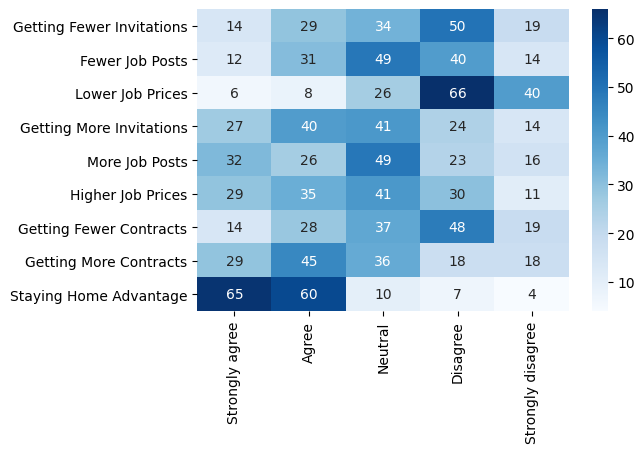

In [5]:
# Strongly agree	Agree	Neutral	Disagree	Strongly disagree
agree_disagree_dataframe = []
for label in agree_disagree_labels:
    answer_data = [0, 0, 0, 0, 0]
    for ans in dataframe[label].values:
        if ans == 'Strongly agree': answer_data[0] += 1
        if ans == 'Agree': answer_data[1] += 1
        if ans == 'Neutral': answer_data[2] += 1
        if ans == 'Disagree': answer_data[3] += 1
        if ans == 'Strongly disagree': answer_data[4] += 1
    agree_disagree_dataframe.append(answer_data)

agree_disagree_dataframe = pd.DataFrame(agree_disagree_dataframe)
agree_disagree_dataframe.columns = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']
agree_disagree_dataframe.index = agree_disagree_labels

pyplot.figure(dpi=100)
sns.heatmap(agree_disagree_dataframe, annot=True, fmt='.4g', cmap='Blues')

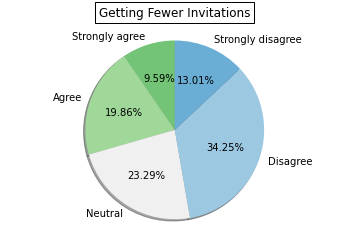

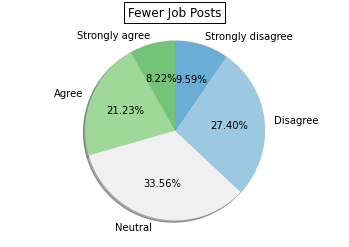

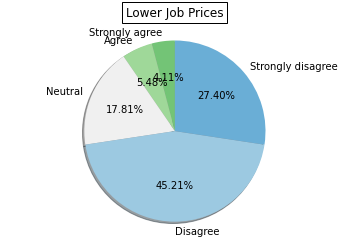

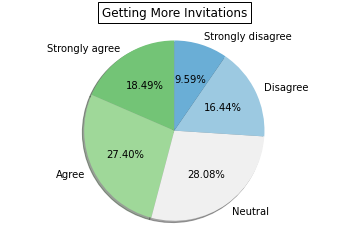

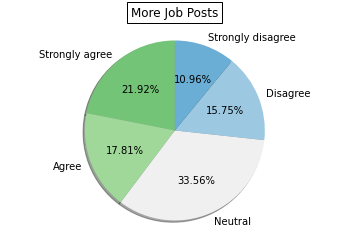

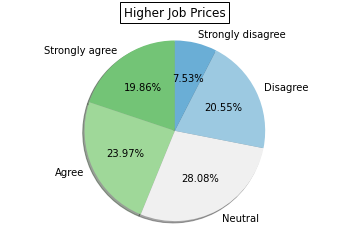

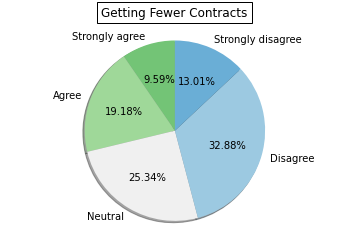

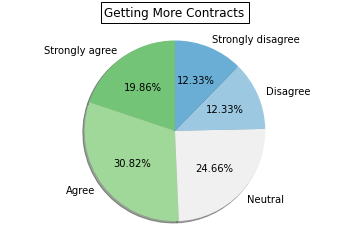

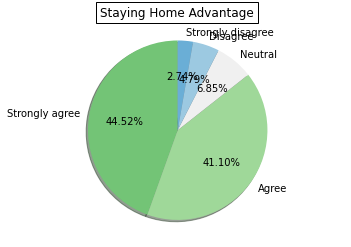

In [6]:
import matplotlib.pyplot as plt

for i in range(0, len(agree_disagree_dataframe.values)):
    labels = agree_disagree_dataframe.columns.values
    sizes = agree_disagree_dataframe.values[i]

    fig1, ax1 = plt.subplots()
    ax1.pie(
        sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90,
        colors=['#73c476', '#9fd899', '#F0F0F0', '#9cc9e1', '#6aaed6']
    )
    ax1.axis('equal')
    pyplot.margins(0.1)
    plt.title(agree_disagree_labels[i], bbox={ 'facecolor':'1', 'pad': 4 })
    plt.show()

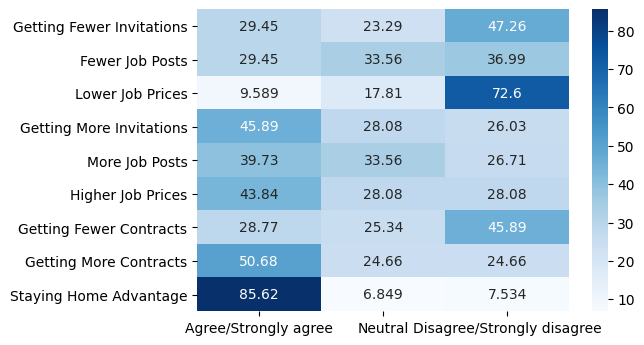

In [7]:
# Strongly agree or Agree	Neutral	Disagree or Strongly disagree
agree_disagree_dataframe = []
for label in agree_disagree_labels:
    answer_data = [0, 0, 0]
    for ans in dataframe[label].values:
        if ans == 'Strongly agree': answer_data[0] += 1
        if ans == 'Agree': answer_data[0] += 1
        if ans == 'Neutral': answer_data[1] += 1
        if ans == 'Disagree': answer_data[2] += 1
        if ans == 'Strongly disagree': answer_data[2] += 1
            
    total_ans = sum(answer_data)
    for i in range(0, len(answer_data)):
        answer_data[i] = answer_data[i]/total_ans * 100
        
    agree_disagree_dataframe.append(answer_data)

agree_disagree_dataframe = pd.DataFrame(agree_disagree_dataframe)
agree_disagree_dataframe.columns = ['Agree/Strongly agree', 'Neutral', 'Disagree/Strongly disagree']
agree_disagree_dataframe.index = agree_disagree_labels

pyplot.figure(dpi=100)
sns.heatmap(agree_disagree_dataframe, annot=True, fmt='.4g', cmap='Blues')

# Yes No Questions

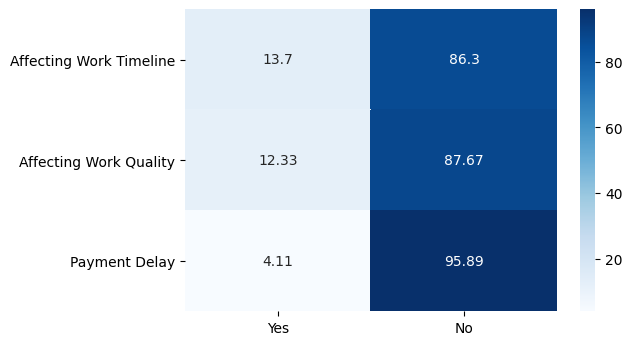

In [8]:
# Strongly agree	Agree	Neutral	Disagree	Strongly disagree
yes_no_dataframe = []
for label in yes_no_labels:
    answer_data = [0, 0]
    for ans in dataframe[label].values:
        if ans == 'Yes': answer_data[0] += 1
        if ans == 'No': answer_data[1] += 1
    
    total_ans = sum(answer_data)
    for i in range(0, len(answer_data)):
        answer_data[i] = answer_data[i]/total_ans * 100
        
    yes_no_dataframe.append(answer_data)

yes_no_dataframe = pd.DataFrame(yes_no_dataframe)
yes_no_dataframe.columns = ['Yes', 'No']
yes_no_dataframe.index = yes_no_labels

pyplot.figure(dpi=100)
sns.heatmap(yes_no_dataframe, annot=True, fmt='.4g', cmap='Blues')

# Numeric Question

In [9]:
numeric_total_dataframe = [
    ['Rating', 'Total Count'],
    [1, 0],
    [2, 0],
    [3, 0],
    [4, 0],
    [5, 0]
]
numeric_dataframe = [
    ['Rating', 'Upwork', 'Freelancer', 'PeoplePerHour'],
    [1, 0, 0, 0],
    [2, 0, 0, 0],
    [3, 0, 0, 0],
    [4, 0, 0, 0],
    [5, 0, 0, 0]
]
for i in range(0, len(dataframe.values)):
    data = dataframe.values[i]
    if data[1] == 'Upwork': numeric_dataframe[data[16]][1] += 1
    if data[1] == 'Freelancer': numeric_dataframe[data[16]][2] += 1
    if data[1] == 'PeoplePerHour': numeric_dataframe[data[16]][3] += 1
    numeric_total_dataframe[data[16]][1] += 1
    
numeric_total_dataframe = pd.DataFrame(numeric_total_dataframe)
numeric_total_dataframe.columns = ['Rating', 'Total Count']
numeric_total_dataframe = numeric_total_dataframe.drop(0)
        
numeric_dataframe = pd.DataFrame(numeric_dataframe)
numeric_dataframe.columns = ['Rating', 'Upwork', 'Freelancer', 'PeoplePerHour']
numeric_dataframe = numeric_dataframe.drop(0)
numeric_dataframe

,Rating,Upwork,Freelancer,PeoplePerHour
1,1,2,1,0
2,2,0,1,0
3,3,15,1,1
4,4,28,14,1
5,5,65,14,3


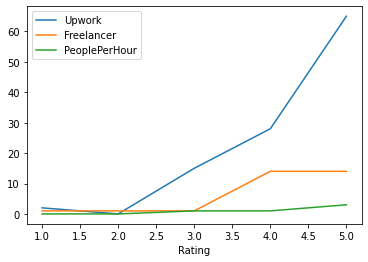

In [10]:
ax = pyplot.gca()
numeric_dataframe.plot(kind='line', x='Rating', y=['Upwork', 'Freelancer', 'PeoplePerHour'], ax=ax)
pyplot.show()

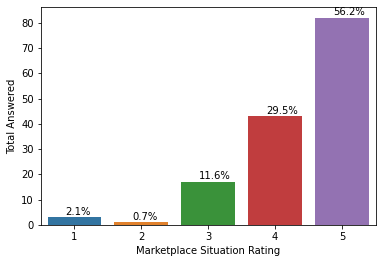

In [11]:
df = dataframe
ay = sns.countplot(x="Marketplace Situation Rating", data=df)
plt.ylabel('Total Answered')

total = len(df['Marketplace Situation Rating'])
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/3
    y = p.get_y() + p.get_height() + 1
    ay.annotate(percentage, (x, y))

# MCQ Questions

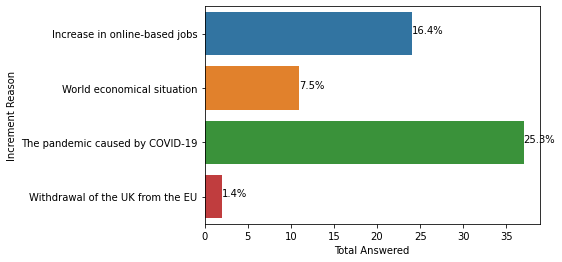

In [12]:
df = dataframe
ax = sns.countplot(y="Increment Reason", data=df)
plt.xlabel('Total Answered')

total = len(df['Increment Reason'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

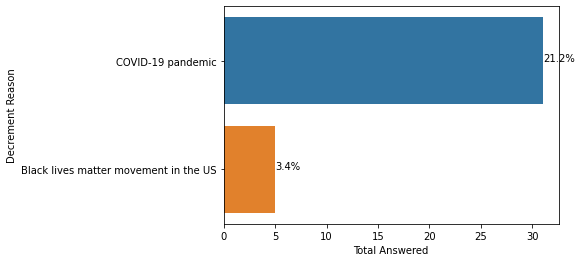

In [13]:
df = dataframe
ax = sns.countplot(y="Decrement Reason", data=df)
plt.xlabel('Total Answered')

total = len(df['Decrement Reason'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))